#### Define Outlier Points with Plot

In [133]:
## first import packages
from __future__ import print_function
import patsy
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import QuantileRegressor
import plyer
from patsy import dmatrices

In [119]:
## generate data
seed = 1234
n = 20
Error = stats.norm.rvs(0, .5, n, random_state = seed)
Error2 = np.delete(Error, n-1)
x1 = stats.uniform.rvs(-2, 4, n-1, random_state = seed)
x1 = np.append(x1, 6)
x2 = stats.uniform.rvs(-2, 5, n-1, random_state = seed)
xx2 = np.append(x2, 4.5)
xxx2 = np.linspace(-2, 4.5, 1000)
x3 = stats.uniform.rvs(-2.5, 5, n, random_state = seed)
xxx3 = np.linspace(-2.5, 2.5, 1000)
x3[9] = 0
y1 = 4 * x1 + 1 + Error
y2 = 2.5 * x2 + 2.5 
y21 = y2 + Error2
yy22 = np.append(y2, 50) + Error
y3 = 2.5 * x3 + 2.5 + Error
y3[9] = 40


In [120]:
## implement regression model 
l_reg = LinearRegression(fit_intercept=True)
X1 = x1[:, np.newaxis]
md1 = l_reg.fit(X1, y1)
yhat1 = md1.predict(X1)
X21 = x2[:, np.newaxis]
X22 = xx2[:, np.newaxis]
md21 = l_reg.fit(X21, y21)
b21 = md21.coef_
b21 = b21[0]
a21 = md21.intercept_
yhat21 = b21 * xxx2 + a21
md22 = l_reg.fit(X22, yy22)
b22 = md21.coef_
b22 = b22[0]
a22 = md22.intercept_
yhat22 = b22 * xxx2 + a22

x31 = np.delete(x3, 9)
X31 = x31[:, np.newaxis]
y31 = np.delete(y3, 9)
md31 = l_reg.fit(X31, y31)
b31 = md31.coef_
b31 = b31[0]
a31 = md31.intercept_
yhat31 = b31 * xxx3 + a31

X32 = x3[:, np.newaxis]
md32 = l_reg.fit(X32, y3)
b32 = md32.coef_
b32 = b32[0]
a32 = md32.intercept_
yhat32 = b32 * xxx3 + a32


In [106]:
a21

2.681032152171775

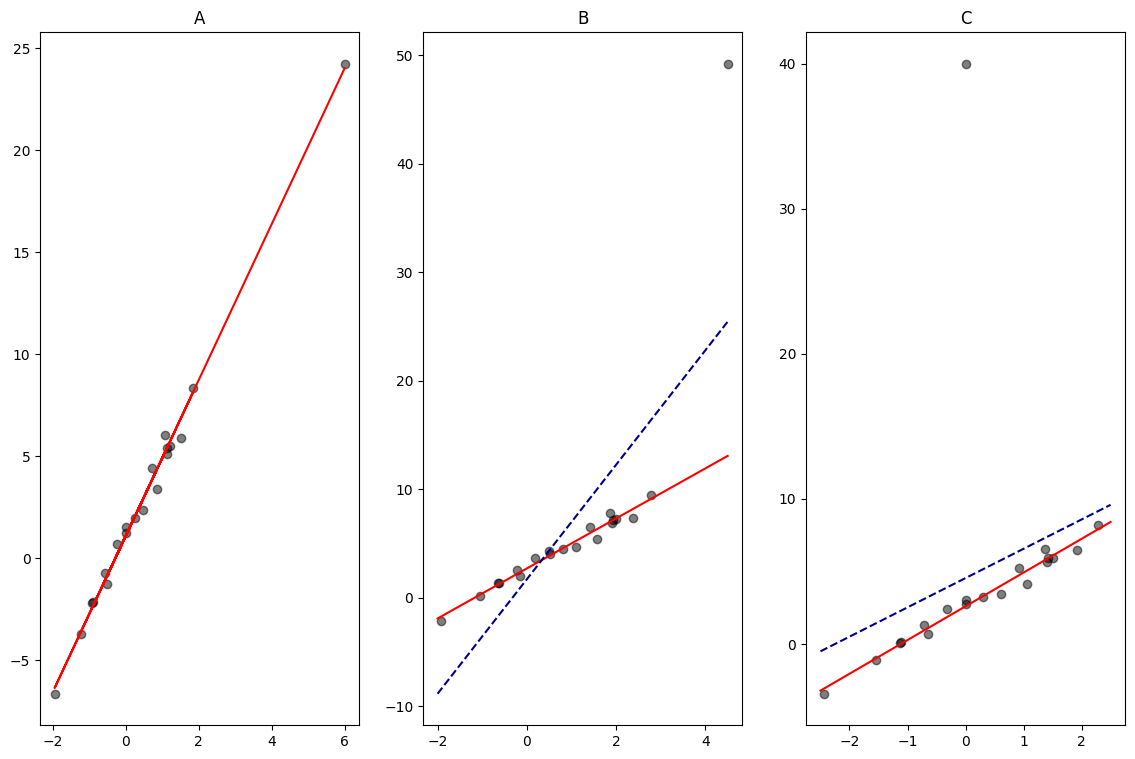

In [121]:
## plot graphs for scatter and linear regression
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 9))
ax1.scatter(x1, y1, color = "black", alpha = 0.5, 
            label = "Observation")
ax1.plot(x1, yhat1, color = "red", label = "regression line")
ax2.scatter(xx2, yy22, color = "black", alpha = 0.5, 
            label = "observation")
ax2.plot(xxx2, yhat21, color = "red", 
         label = "regression line without outlier point")
ax2.plot(xxx2, yhat22, color = "darkblue", linestyle = "dashed")
ax3.scatter(x3, y3, color = "black", alpha = 0.5, 
            label = "observation")
ax3.plot(xxx3, yhat31, color = "red")
ax3.plot(xxx3, yhat32, color = "darkblue", linestyle = "dashed")
ax1.set_title("A")
ax2.set_title("B")
ax3.set_title("C")
plt.show()

## First Example

In [123]:
pathh = plyer.filechooser.open_file()[0]


In [124]:
dat = pd.read_excel(pathh)
dat.describe()

,curb_weight,num_of_cylinders,engine_size,price
count,201.000000,201.000000,201.000000,201.000000
mean,2555.666667,4.363184,126.875622,13207.129353
std,517.296727,1.059452,41.546834,7947.066342
min,1488.000000,2.000000,61.000000,5118.000000
25%,2169.000000,4.000000,98.000000,7775.000000
50%,2414.000000,4.000000,120.000000,10295.000000
75%,2926.000000,4.000000,141.000000,16500.000000
max,4066.000000,12.000000,326.000000,45400.000000


In [156]:
list(dat.columns.values)

['make',
 'aspiration',
 'body_style',
 'curb_weight',
 'num_of_cylinders',
 'engine_size',
 'price']

In [161]:
dat['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [159]:
dat['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [160]:
dat['body_style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [162]:
dat['num_of_cylinders'].value_counts()

4     157
6      24
5      10
2       4
8       4
3       1
12      1
Name: num_of_cylinders, dtype: int64

In [163]:
dat['curb_weight'].describe()

count     201.000000
mean     2555.666667
std       517.296727
min      1488.000000
25%      2169.000000
50%      2414.000000
75%      2926.000000
max      4066.000000
Name: curb_weight, dtype: float64

In [164]:
dat['engine_size'].describe()

count    201.000000
mean     126.875622
std       41.546834
min       61.000000
25%       98.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine_size, dtype: float64

In [165]:
dat['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

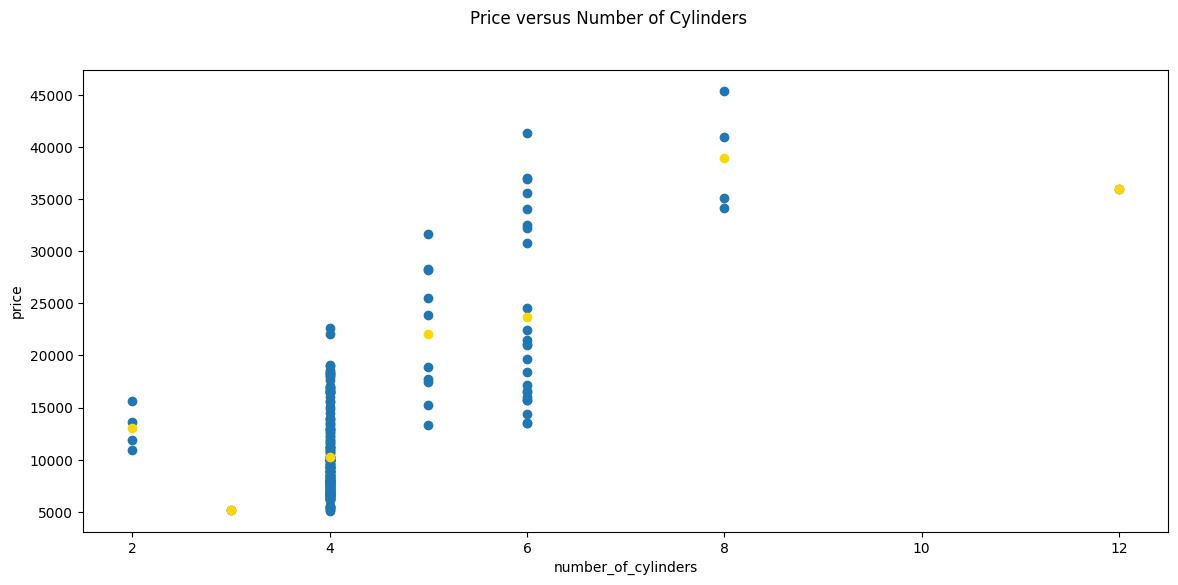

In [132]:
#Plot price versus num_of_cylinders
fig = plt.figure(figsize = (14, 6))
fig.suptitle('Price versus Number of Cylinders')
plt.xlabel('number_of_cylinders')
plt.ylabel('price')
plt.scatter(x=dat['num_of_cylinders'], y=dat['price'])
num_of_cylinders = np.array(dat.groupby('num_of_cylinders')['num_of_cylinders'].mean())
conditional_means = np.array(dat.groupby('num_of_cylinders')['price'].mean())
plt.scatter(x=num_of_cylinders, y=conditional_means, color='gold', marker='o')
plt.show()

In [140]:
## use patsy syntax for define Design Matrix

reg_exp = 'price ~ num_of_cylinders'
y_train, X_train = dmatrices(reg_exp, dat, return_type='dataframe')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     200.7
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.73e-32
Time:                        05:20:48   Log-Likelihood:                -2019.7
No. Observations:                 201   AIC:                             4043.
Df Residuals:                     199   BIC:                             4050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -9985.9377   1684.299  

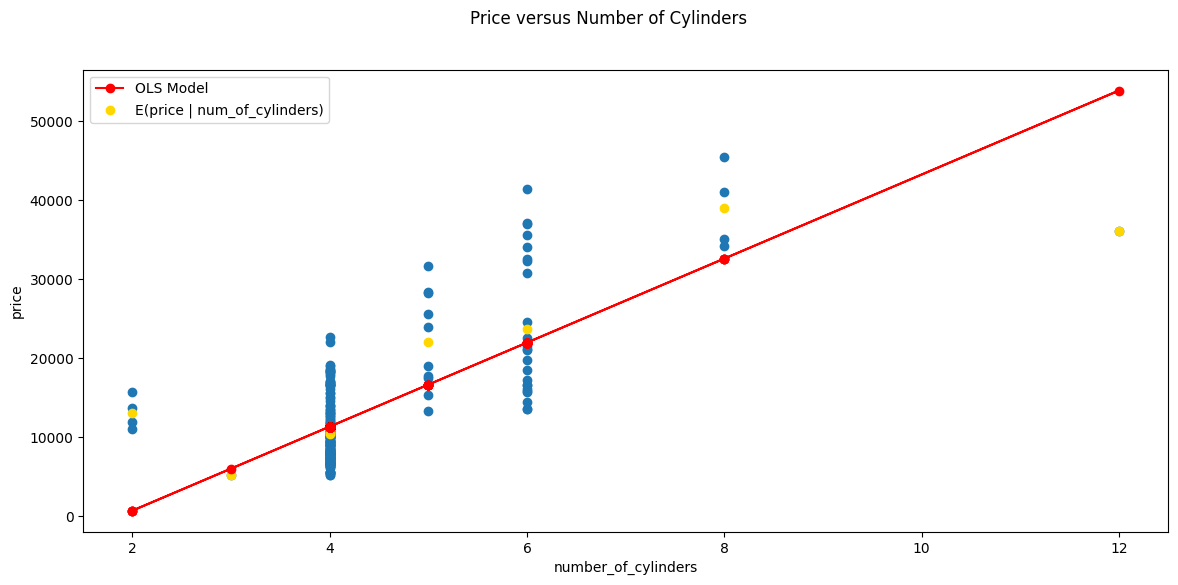

In [144]:
#Build and train an OLS regression model
olsr_model = sm.OLS(endog=y_train, exog=X_train)
olsr_model_results = olsr_model.fit()
print(olsr_model_results.summary())

#Plot the OLS regression line on the scatter plot of Price versus num_of_cylinders
fig = plt.figure(figsize = (14, 6))
fig.suptitle('Price versus Number of Cylinders')
plt.xlabel('number_of_cylinders')
plt.ylabel('price')
plt.scatter(x=dat['num_of_cylinders'], y=dat['price'])#Get the estimated conditional means from the trained OLS model
y_pred_ols = olsr_model_results.predict(X_train)#Plot the estimated conditional means
ols, = plt.plot(X_train['num_of_cylinders'], y_pred_ols,
    color='red', marker='o', linestyle='solid', label='OLS Model')#Also plot the observed conditional means i.e. E(price | num_of_cylinders)
conditional_mean_pts = plt.scatter(x=num_of_cylinders, y=conditional_means, c='gold', marker='o', label='E(price | num_of_cylinders)')

plt.legend(handles=[ols, conditional_mean_pts])
plt.show()

In [185]:
median_model = smf.quantreg(formula = reg_exp, data = dat)
median_model_results = median_model.fit(q=0.5)
median_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                  price   Pseudo R-squared:               0.2452
Model:                       QuantReg   Bandwidth:                       3963.
Method:                 Least Squares   Sparsity:                    1.064e+04
Date:                Sun, 04 Jun 2023   No. Observations:                  201
Time:                        11:36:01   Df Residuals:                      199
                                        Df Model:                            1
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.509e+04   1594.202     -9.462      0.000   -1.82e+04   -1.19e+04
num_of_cylinders  6095.0000    355.108     17.164      0.000    5394.743    6795.257
====================================================================================
"""

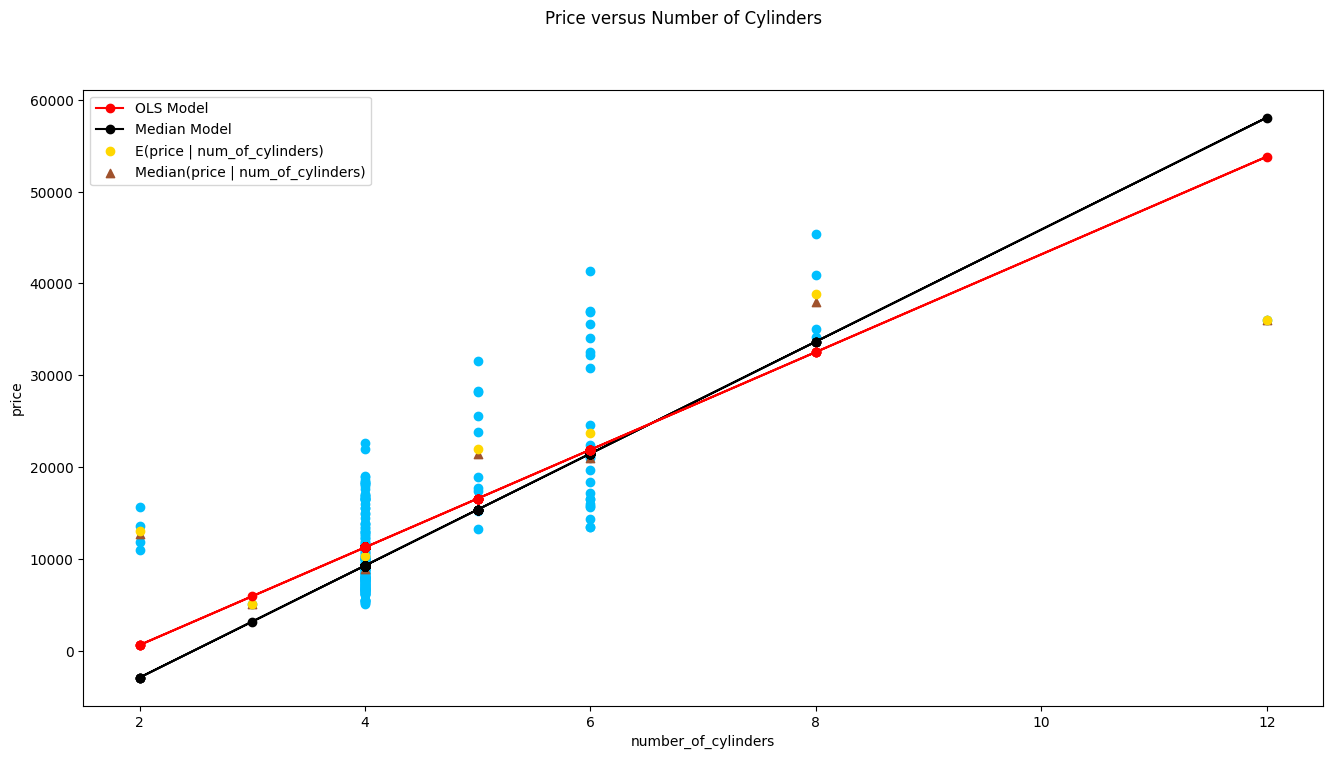

In [174]:
fig = plt.figure(figsize = (16, 8)) 
fig.suptitle('Price versus Number of Cylinders')
plt.xlabel('number_of_cylinders')
plt.ylabel('price') # Show the scatter plot of price versus num_of_cylinders
plt.scatter(x = dat['num_of_cylinders'], 
            y =dat['price'], c='deepskyblue') # Get the estimated conditional medians from the median model
y_pred_median = median_model_results.predict(X_train) # Plot the estimated conditional medians
median, = plt.plot(X_train['num_of_cylinders'], y_pred_median,
    color='black', marker='o', linestyle='solid',  label='Median Model') # For comparison, also plot the estimated conditional means from the OLS model we built earlier
ols, = plt.plot(X_train['num_of_cylinders'], y_pred_ols,
    color='red', marker='o', linestyle='solid',  label='OLS Model') # Calculate the observed conditional medians
conditional_medians = np.array(dat.groupby('num_of_cylinders')['price'].median())#Plot the observed conditional medians
conditional_median_pts = plt.scatter(x=num_of_cylinders, y=conditional_medians, c='sienna', marker='^', label='Median(price | num_of_cylinders)')#For comparison, plot the observed conditional means
conditional_mean_pts = plt.scatter(x=num_of_cylinders, y=conditional_means, c='gold', marker='o', label='E(price | num_of_cylinders)')#Set up the legend and show the plot
plt.legend(handles=[ols, median, conditional_mean_pts, conditional_median_pts])

plt.show()

In [199]:
yhat_quantile = median_model_results.predict(dat['num_of_cylinders'])
yhat_ols = olsr_model_results.predict(X_train)
print("""
MSE for Quantile Regression: {}
MSE for OLS Regression: {}
MAE for Quantile Regression: {}
MAE for OLS Regression: {}
""".format(mean_squared_error(y_train, yhat_quantile),
mean_squared_error(y_train, yhat_ols), 
mean_absolute_error(y_train, yhat_quantile), 
mean_absolute_error(y_train, yhat_ols)))


MSE for Quantile Regression: 34847318.981798045
MSE for OLS Regression: 31283942.142610822
MAE for Quantile Regression: 4110.094527365671
MAE for OLS Regression: 4380.489533627015



                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.1868
Model:                       QuantReg   Bandwidth:                       3974.
Method:                 Least Squares   Sparsity:                    1.218e+04
Date:                Sun, 04 Jun 2023   No. Observations:                  201
Time:                        14:12:11   Df Residuals:                      199
                                        Df Model:                            1
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -8206.5000   1748.197     -4.694      0.000   -1.17e+04   -4759.131
num_of_cylinders  3683.8750    402.717      9.148      0.000    2889.735    4478.015
                         QuantReg Regression Results                          
Dep. Variable:              

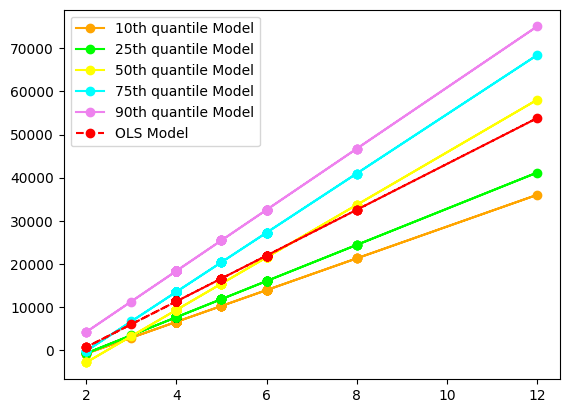

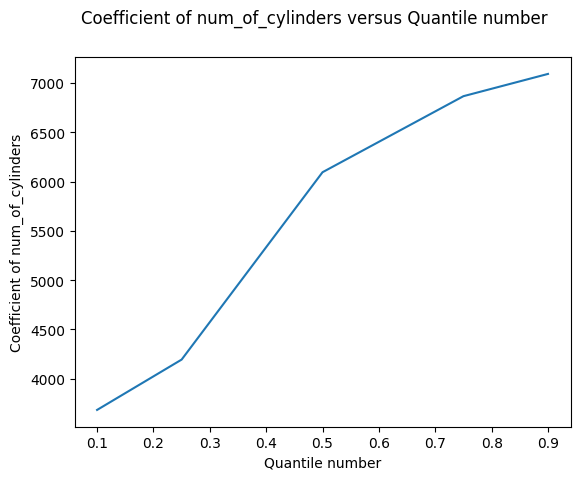

In [201]:
coeff = []
colors = ['orange', 'lime', 'yellow', 'cyan', 'violet']
i=0
handles = []
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
for q in quantiles:
    quantile_model = smf.quantreg(formula = reg_exp, data = dat)
    quantile_model_results = quantile_model.fit(q = q)
    print(quantile_model_results.summary())
    coeff.append(quantile_model_results.params['num_of_cylinders'])
    y_pred_quantile = quantile_model_results.predict(X_train)
    quantile, = plt.plot(X_train['num_of_cylinders'], y_pred_quantile,
        color=colors[i], marker='o', linestyle='solid',  label=str(int(q*100))+'th quantile Model')
    i = i+1
    handles.append(quantile)

ols, = plt.plot(X_train['num_of_cylinders'], y_pred_ols,
    color='red', marker='o', linestyle='dashed',  label='OLS Model')

handles.append(ols)
plt.legend(handles=handles)
plt.show()

#Plot the coefficient of num_of_cylinders versus quantile number
fig = plt.figure()
fig.suptitle('Coefficient of num_of_cylinders versus Quantile number')
plt.xlabel('Quantile number')
plt.ylabel('Coefficient of num_of_cylinders')
plt.plot(quantiles, coeff)
plt.show()

***
***

## Example II

In [331]:
m = 100
xe1 = stats.norm.rvs(loc = 10, scale = 2, size = m, random_state = 231)
XX1 = xe1[:, np.newaxis]
SCale = np.linspace(1, 1000, m)
err = stats.norm.rvs(loc = 0, scale = SCale, size = m, random_state = 331)
beta1 = 2; beta0 = 10
y = beta0 + beta1 * xe1 + err 

reg_builder = LinearRegression()
Model_ols = reg_builder.fit(XX1, y)
beta1_hat = Model_ols.coef_; beta1_hat = beta1_hat[0]
beta0_hat = Model_ols.intercept_
yhat = Model_ols.predict(XX1)
Residuals = y - yhat
dat2 = np.stack([xe1, y], axis = 1)
dat2 = pd.DataFrame(dat2, columns = ["x", "y"])

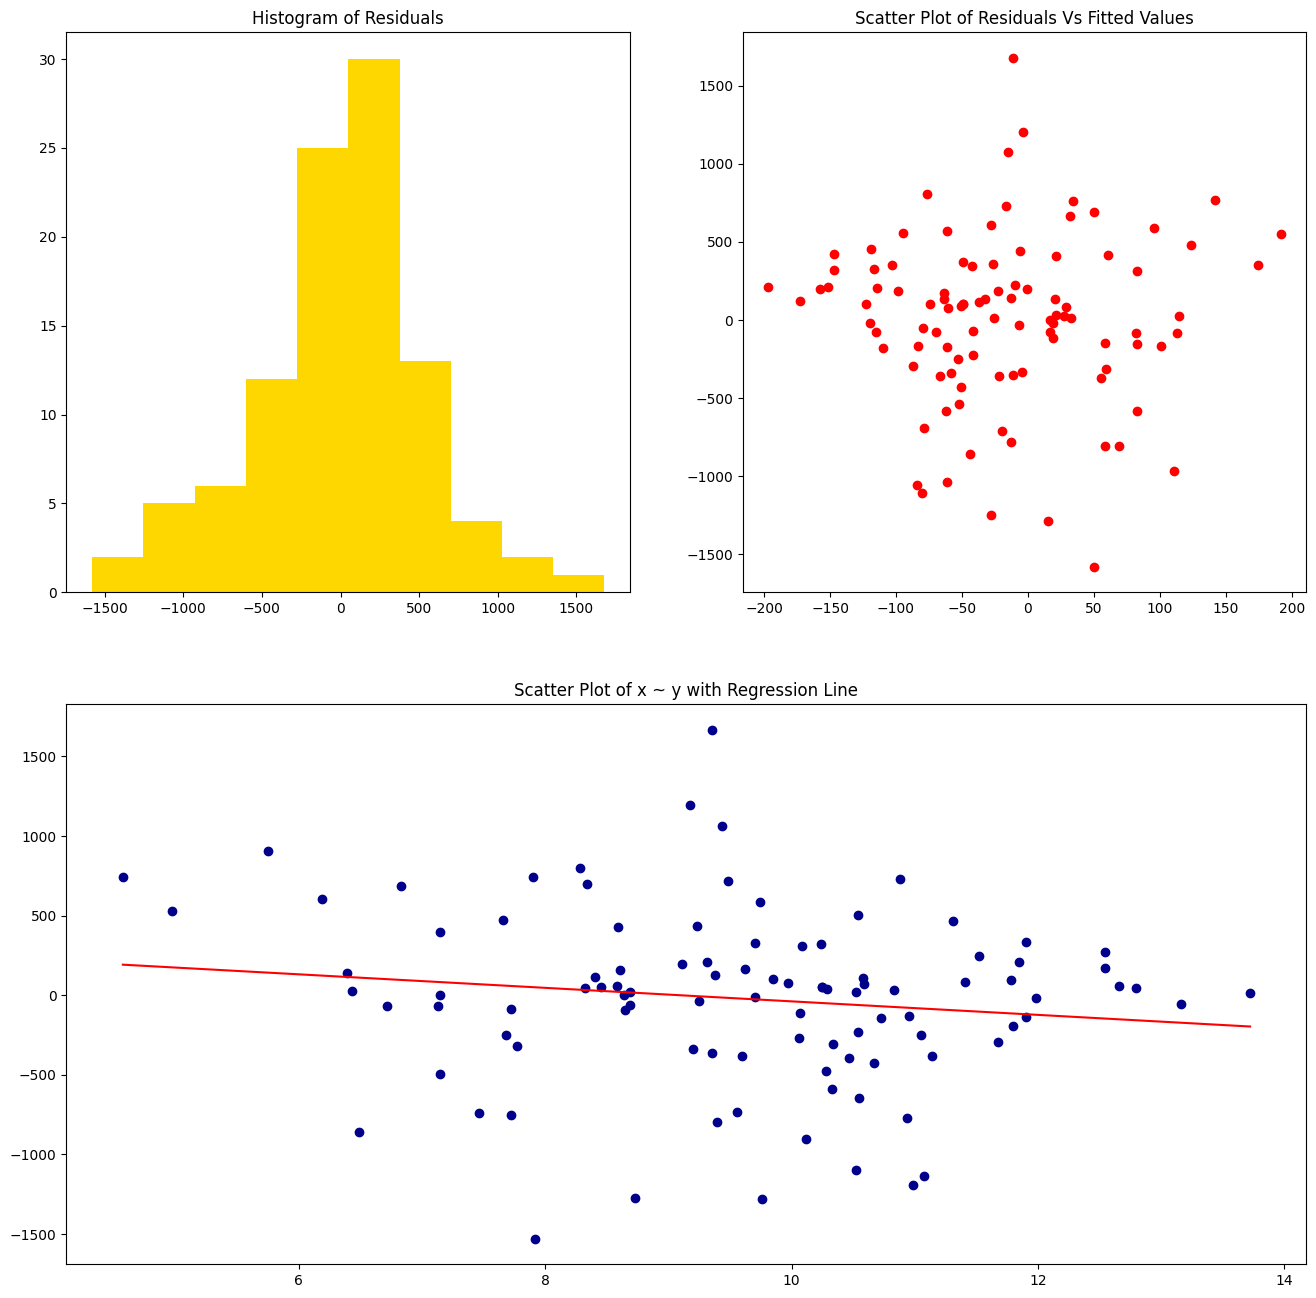

In [297]:
from matplotlib import gridspec
m1 = xe1.min()
m2 = xe1.max()
xx = np.linspace(m1, m2, 1000)
yy = beta0_hat + beta1_hat * xx

fig, ax = plt.subplots(figsize = (16, 16))
fig.clf()
gs = gridspec.GridSpec(2, 2, hspace = 0.2, 
                       wspace = 0.2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax1.hist(Residuals, color = "gold")
ax1.set_title("Histogram of Residuals")
ax2.scatter(x = yhat, y = Residuals, color = "red")
ax2.set_title("Scatter Plot of Residuals Vs Fitted Values")
ax3.scatter(x = xe1, y = y, color = "darkblue")
ax3.plot(xx, yy, color = "red")
ax3.set_title("Scatter Plot of x ~ y with Regression Line")
plt.show()

## Fitting a QuantileRegressor

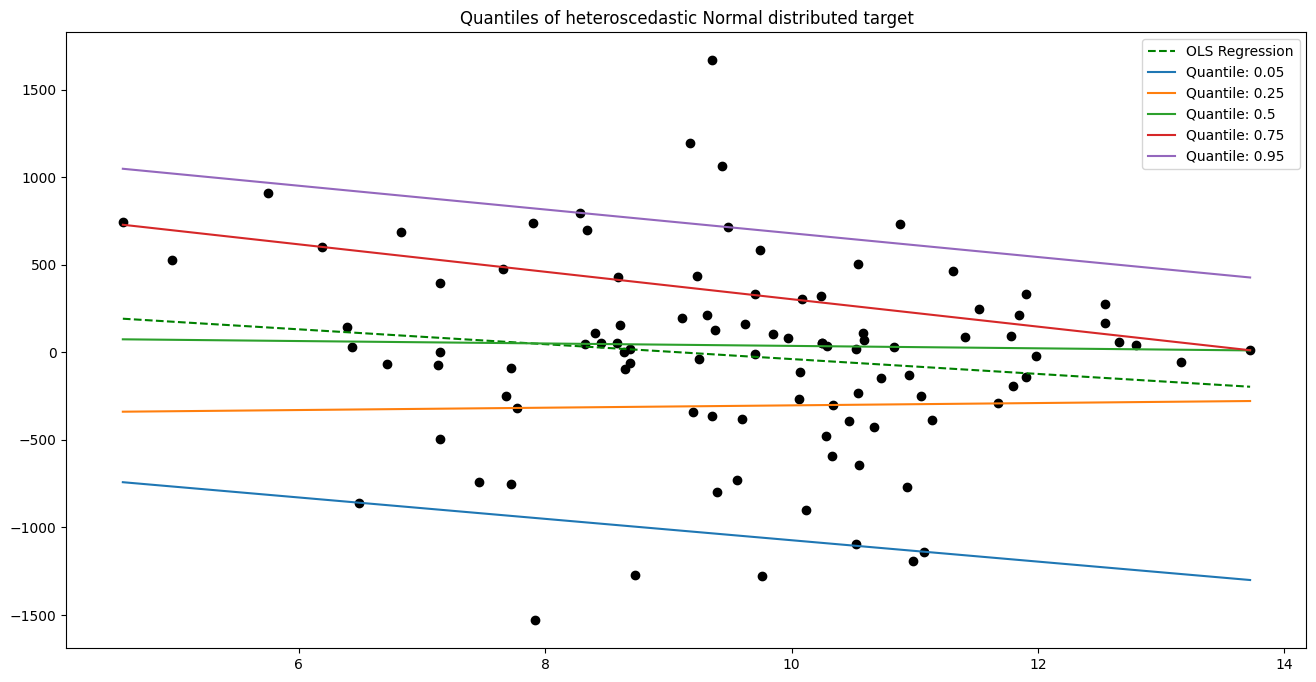

In [325]:
quantiles = [0.05, 0.25, 0.5, 0.75, 0.95]
predictions = {}
for qq in quantiles:
    qr = QuantileRegressor(quantile = qq, alpha = 0, solver = "highs")
    Modelq = qr.fit(XX1, y)
    behat1_q = Modelq.coef_; behat1_q = behat1_q[0]
    behat0_q = Modelq.intercept_
    yyq = behat0_q + behat1_q * xx
    predictions[qq] = yyq

fig = plt.figure(figsize = (16, 8))
plt.scatter(x = xe1, y = y, color = "black")
plt.plot(xx, yy, color = "green", 
         linestyle = "dashed", label = "OLS Regression")

for qq, yq in predictions.items():
    plt.plot(xx, yq,  label = f"Quantile: {qq}")
plt.legend()
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")
plt.show()

In [332]:
qr = QuantileRegressor(quantile = 0.5, alpha = 0, solver = "highs")
Modelq = qr.fit(XX1, y)
yhat_q = Modelq.predict(XX1)


print("""
MSE for Quantile Regression: {}
MSE for OLS Regression: {}
MAE for Quantile Regression: {}
MAE for OLS Regression: {}
""".format(mean_squared_error(y, yhat_q),
mean_squared_error(y, yhat), 
mean_absolute_error(y, yhat_q), 
mean_absolute_error(y, yhat)))


MSE for Quantile Regression: 298578.7968277299
MSE for OLS Regression: 290913.9721842409
MAE for Quantile Regression: 391.8382864931908
MAE for OLS Regression: 399.19820048300755



## Cross Validation

In [335]:
from sklearn.model_selection import cross_validate

cv_results_lr = cross_validate(
    reg_builder,
    XX1,
    y,
    cv=5,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
cv_results_qr = cross_validate(
    qr,
    XX1,
    y,
    cv=5,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
print(
    f"""Test error (cross-validated performance)
    {reg_builder.__class__.__name__}:
    MAE = {-cv_results_lr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_lr["test_neg_mean_squared_error"].mean():.3f}
    {qr.__class__.__name__}:
    MAE = {-cv_results_qr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_qr["test_neg_mean_squared_error"].mean():.3f}
    """
)

Test error (cross-validated performance)
    LinearRegression:
    MAE = 410.095
    MSE = 299558.236
    QuantileRegressor:
    MAE = 406.917
    MSE = 303250.314
    


***
***